In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
# Kaggle api
!kaggle datasets download tongpython/cat-and-dog


Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 97% 211M/218M [00:01<00:00, 144MB/s]
100% 218M/218M [00:01<00:00, 151MB/s]


In [4]:
!ls

cat-and-dog.zip  kaggle.json  sample_data


In [5]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/cat-and-dog.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/training_set/training_set/cats'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  4001


In [7]:
import os
import shutil

# Source and destination directories
source_dir = "/content/training_set/training_set/cats"
destination_dir = "/content/train_data"

# Create the destination directory if it doesn't exist
os.makedirs(destination_dir, exist_ok=True)

# Counter to track the number of files moved
file_count = 0
max_files = 1000  # Number of files to move

# Move files
for file_name in os.listdir(source_dir):
    source_path = os.path.join(source_dir, file_name)
    destination_path = os.path.join(destination_dir, file_name)

    # Check if it's a file before moving
    if os.path.isfile(source_path):
        shutil.move(source_path, destination_path)
        file_count += 1

        # Stop after moving 1000 files
        if file_count >= max_files:
            break

print(f"{file_count} images moved to {destination_dir}")


1000 images moved to /content/train_data


In [8]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/training_set/training_set/dogs'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  4006


In [9]:
import os
import shutil

# Source and destination directories
source_dir = "/content/training_set/training_set/dogs"
destination_dir = "/content/train_data"

# Create the destination directory if it doesn't exist
os.makedirs(destination_dir, exist_ok=True)

# Counter to track the number of files moved
file_count = 0
max_files = 1000  # Number of files to move

# Move files
for file_name in os.listdir(source_dir):
    source_path = os.path.join(source_dir, file_name)
    destination_path = os.path.join(destination_dir, file_name)

    # Check if it's a file before moving
    if os.path.isfile(source_path):
        shutil.move(source_path, destination_path)
        file_count += 1

        # Stop after moving 1000 files
        if file_count >= max_files:
            break

print(f"{file_count} images moved to {destination_dir}")


1000 images moved to /content/train_data


In [10]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk("/content/train_data"))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  1999


In [11]:
file_names = os.listdir("/content/train_data")
print(file_names)

['dog.1582.jpg', 'cat.910.jpg', 'dog.1088.jpg', 'cat.3757.jpg', 'cat.3922.jpg', 'cat.2487.jpg', 'dog.1935.jpg', 'dog.1876.jpg', 'dog.2121.jpg', 'dog.3654.jpg', 'dog.632.jpg', 'cat.3039.jpg', 'cat.2940.jpg', 'cat.1172.jpg', 'dog.246.jpg', 'cat.695.jpg', 'dog.3502.jpg', 'cat.3568.jpg', 'cat.1017.jpg', 'dog.3516.jpg', 'dog.2393.jpg', 'cat.3772.jpg', 'dog.1036.jpg', 'cat.3317.jpg', 'dog.1178.jpg', 'dog.3366.jpg', 'cat.2130.jpg', 'dog.2189.jpg', 'dog.84.jpg', 'cat.2452.jpg', 'dog.3853.jpg', 'cat.3257.jpg', 'dog.3936.jpg', 'dog.3229.jpg', 'dog.3330.jpg', 'cat.3887.jpg', 'cat.3786.jpg', 'cat.3510.jpg', 'cat.779.jpg', 'cat.2392.jpg', 'cat.2056.jpg', 'dog.1055.jpg', 'dog.2027.jpg', 'dog.3178.jpg', 'dog.643.jpg', 'cat.2934.jpg', 'cat.2471.jpg', 'cat.1570.jpg', 'dog.1430.jpg', 'cat.444.jpg', 'dog.1373.jpg', 'cat.2873.jpg', 'cat.1879.jpg', 'dog.1229.jpg', 'cat.490.jpg', 'dog.570.jpg', 'cat.3208.jpg', 'cat.2329.jpg', 'cat.2321.jpg', 'dog.2334.jpg', 'cat.794.jpg', 'cat.2793.jpg', 'dog.2900.jpg', 'do

In [12]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

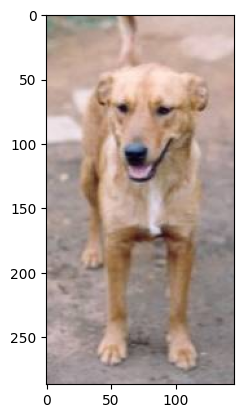

In [16]:
# display dog image
img = mpimg.imread('/content/train_data/dog.1582.jpg')
imgplt = plt.imshow(img)
plt.show()

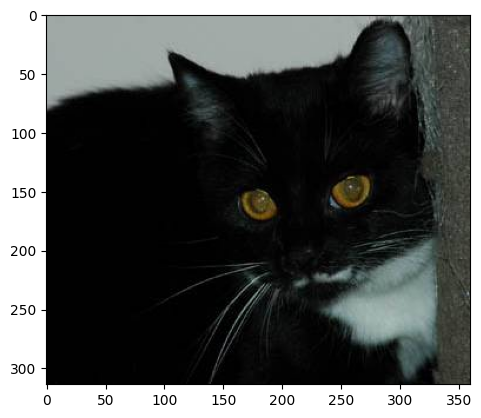

In [18]:
# display cat image
img = mpimg.imread('/content/train_data/cat.910.jpg')
imgplt = plt.imshow(img)
plt.show()

In [19]:
file_names = os.listdir('/content/train_data/')

for i in range(10):
  name = file_names[i]
  print(name[0:3])


dog
cat
dog
cat
cat
cat
dog
dog
dog
dog


In [20]:
dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 999
Number of cat images = 1000


In [21]:
#creating a directory for resized images
os.mkdir('/content/train_image_resized')

In [22]:

import os
from PIL import Image

original_folder = "/content/train_data/"
output_folder = "/content/train_image_resized/"

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Process each file in the folder
for filename in os.listdir(original_folder):
    img_path = os.path.join(original_folder, filename)

    # Skip directories
    if os.path.isdir(img_path):
        continue

    try:
        # Open, resize, and save the image
        img = Image.open(img_path)
        img = img.resize((224, 224))
        img = img.convert('RGB')
        img.save(os.path.join(output_folder, filename))
    except Exception as e:
        print(f"Error processing file {filename}: {e}")

print(f"All images resized and saved to {output_folder}")



Error processing file _DS_Store: cannot identify image file '/content/train_data/_DS_Store'
All images resized and saved to /content/train_image_resized/


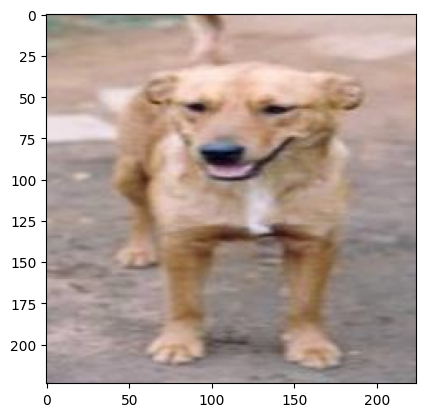

In [24]:
# display resized dog image
img = mpimg.imread('/content/train_image_resized/dog.1582.jpg')
imgplt = plt.imshow(img)
plt.show()

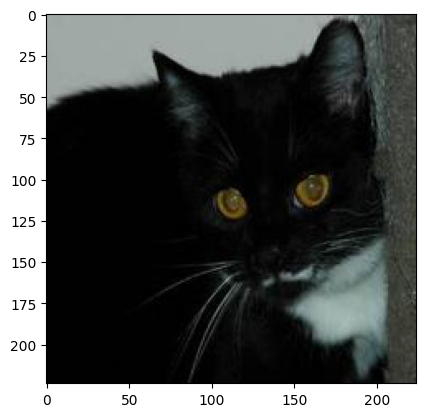

In [25]:
# display resized dog image
img = mpimg.imread('/content/train_image_resized/cat.910.jpg')
imgplt = plt.imshow(img)
plt.show()

In [31]:
# creaing a for loop to assign labels
filenames = os.listdir('/content/train_image_resized')


labels = []

for i in range(len(filenames)):
  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [32]:
print(filenames[0:5])
print(len(filenames))

['dog.1582.jpg', 'cat.910.jpg', 'dog.1088.jpg', 'cat.3757.jpg', 'cat.3922.jpg']
1998


In [33]:
print(labels[0:5])
print(len(labels))

[1, 0, 1, 0, 0]
1998


In [34]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)


[0 1]
[999 999]


In [35]:

import cv2
import glob

In [36]:
image_directory = '/content/train_image_resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [37]:
print(dog_cat_images[0])

[[[134 141 138]
  [134 141 138]
  [131 140 137]
  ...
  [182 189 209]
  [182 189 209]
  [182 189 209]]

 [[138 145 140]
  [138 145 140]
  [135 145 139]
  ...
  [183 190 210]
  [183 190 210]
  [183 190 210]]

 [[141 150 140]
  [141 150 140]
  [139 150 142]
  ...
  [184 191 211]
  [184 191 211]
  [184 191 211]]

 ...

 [[147 141 152]
  [145 139 150]
  [142 136 147]
  ...
  [132 131 133]
  [128 127 129]
  [126 125 127]]

 [[157 149 160]
  [153 145 156]
  [148 140 151]
  ...
  [131 130 132]
  [129 128 130]
  [128 127 129]]

 [[145 137 148]
  [143 135 146]
  [140 132 143]
  ...
  [136 135 137]
  [136 135 137]
  [137 136 138]]]


In [38]:

type(dog_cat_images)



numpy.ndarray

In [39]:
print(dog_cat_images.shape)

(1998, 224, 224, 3)


In [40]:
X = dog_cat_images
y = np.asarray(labels)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1000)

In [42]:
print(X.shape, X_train.shape, X_test.shape, y.shape, y_train.shape, y_test.shape)

(1998, 224, 224, 3) (1498, 224, 224, 3) (500, 224, 224, 3) (1998,) (1498,) (500,)


In [43]:
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [44]:
print(X_train_scaled[0])

[[[0.34901961 0.38823529 0.45490196]
  [0.34117647 0.38039216 0.44705882]
  [0.41960784 0.46666667 0.5372549 ]
  ...
  [0.2745098  0.3372549  0.38823529]
  [0.27058824 0.32156863 0.37647059]
  [0.18039216 0.22745098 0.2745098 ]]

 [[0.32941176 0.36078431 0.42745098]
  [0.33333333 0.37254902 0.43921569]
  [0.34509804 0.38431373 0.45490196]
  ...
  [0.28627451 0.34509804 0.40784314]
  [0.2745098  0.3254902  0.38039216]
  [0.23137255 0.27843137 0.3254902 ]]

 [[0.38431373 0.41176471 0.47058824]
  [0.43921569 0.46666667 0.53333333]
  [0.41568627 0.44313725 0.51764706]
  ...
  [0.25490196 0.31372549 0.37647059]
  [0.25882353 0.30980392 0.36470588]
  [0.2745098  0.32156863 0.36862745]]

 ...

 [[0.20392157 0.28235294 0.35294118]
  [0.27843137 0.35686275 0.42745098]
  [0.22745098 0.30588235 0.37647059]
  ...
  [0.15294118 0.20392157 0.26666667]
  [0.14901961 0.2        0.2627451 ]
  [0.08235294 0.13333333 0.19607843]]

 [[0.24705882 0.3254902  0.39607843]
  [0.28627451 0.36470588 0.43529412]


In [68]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'



In [69]:
from tensorflow.keras import layers
import tensorflow_hub as hub
import tf_keras as keras
import tensorflow as tf
IMAGE_SHAPE = (224,224)

def create_model(model_url, num_classes):
  pretrained_model = hub.KerasLayer(
      mobilenet_model,
      input_shape=(224,224,3),
      trainable=False
      )

  model = keras.Sequential([
    pretrained_model,
    keras.layers.Dense(
        num_classes,
        activation='sigmoid',
        name='output_layer')
  ])
  return model

In [70]:
mobilenet_model = create_model(mobilenet_model, num_classes = 2)

mobilenet_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                     optimizer=keras.optimizers.Adam(),
                     metrics=['accuracy'])




In [71]:
mobilenet_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 output_layer (Dense)        (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [72]:
# mobilenet_history = mobilenet_model.fit(X_train_scaled, y_train,
#                                   epochs=5,
#                                   steps_per_epoch=len(X_train_scaled),
#                                   #validation_data=X,
#                                   #validation_steps=len(test_data),
#                                   verbose = 1)

mobilenet_history = mobilenet_model.fit(
    X_train_scaled,
    y_train,
    epochs=5,
    steps_per_epoch=len(X_train_scaled),
    validation_data=(X_test_scaled, y_test),
    validation_steps=len(X_test_scaled),
    verbose=1
)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1498/1498 [==============================] - 108s 70ms/step - loss: 0.1181 - accuracy: 0.9533 - val_loss: 0.1792 - val_accuracy: 0.9520
Epoch 2/5
1498/1498 [==============================] - 77s 51ms/step - loss: 0.0485 - accuracy: 0.9800 - val_loss: 0.1026 - val_accuracy: 0.9660
Epoch 3/5
1498/1498 [==============================] - 78s 52ms/step - loss: 0.0250 - accuracy: 0.9907 - val_loss: 0.1400 - val_accuracy: 0.9520
Epoch 4/5
1498/1498 [==============================] - 75s 50ms/step - loss: 0.0184 - accuracy: 0.9920 - val_loss: 0.1099 - val_accuracy: 0.9680
Epoch 5/5
1498/1498 [==============================] - 99s 66ms/step - loss: 0.0124 - accuracy: 0.9953 - val_loss: 0.0983 - val_accuracy: 0.9680


In [73]:
score, acc = mobilenet_model.evaluate(X_test_scaled, y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

16/16 [==============================] - 19s 1s/step - loss: 0.0983 - accuracy: 0.9680
Test Loss = 0.0982571616768837
Test Accuracy = 0.9679999947547913


In [75]:
mobilenet_model.save('mobilenet_model.h5')
mobilenet_model.save('cat_vs_dog_mobilenet_model.keras')

/usr/local/lib/python3.10/dist-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Path of the image to be predicted: /content/test_set/test_set/cats/cat.4002.jpg


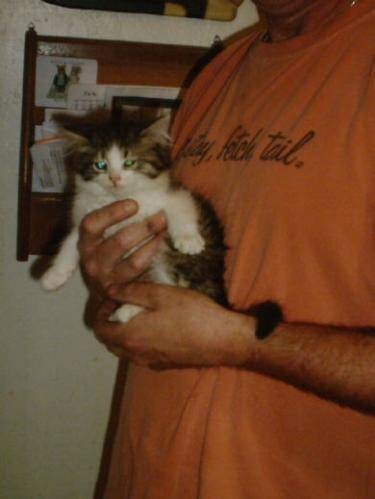

1/1 [==============================] - 1s 604ms/step
[[0.9820833  0.00226688]]
0
The image represents a Cat


In [76]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = mobilenet_model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')